## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Importing data from wikipedia</a> <br>
2. <a href="#item2">Getting neighbourhoods' location data</a><br>

3. <a href="#item3">Clustering the neighbourhoods</a><br>

3.1. <a href="#item4">Clustering withing Toronto</a><br>

4. <a href="#item5">Cluster examination</a><br>

5. <a href="#item6">Conclusions</a>

  
</font>
</div>

<a id='item1'></a>

## 1. Importing data from wikipedia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M',header=0)[0] #download the table
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [3]:
df = df[df.Borough != "Not assigned"]  #get rid of entries without 'Borough'

In [4]:
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [5]:
df = df.groupby('Postcode', as_index=False).agg(lambda x: ', '.join(set(x))) #group repeated postcodes

In [6]:
df.reset_index(drop=True, inplace=True) #clean up index
df.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill"
2,M1E,Scarborough,"Morningside, Guildwood, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [7]:
df.shape

(103, 3)

<a id='item2'></a>

## 2. Getting neighbourhoods' location data

In [8]:
import geocoder # import geocoder
#doesnt work, returns None

In [9]:
geo_data=pd.read_csv("Geospatial_Coordinates.csv") #had to download the file
geo_data.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [10]:
df['Latitude']=geo_data['Latitude'].values #postal codes in data frame and geo data correspond to each other
df['Longitude']=geo_data['Longitude'].values

In [11]:
df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497
2,M1E,Scarborough,"Morningside, Guildwood, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, East Birchmount Park, Ionview",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Oakridge, Golden Mile",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Cliffside West, Birch Cliff",43.692657,-79.264848


<a id='item3'></a>

## 3. Clustering the neighbourhoods

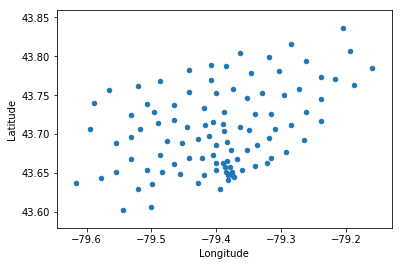

In [12]:
#prepare data for clustering, remove str columns
df_cluster = df.drop(['Postcode', 'Borough','Neighbourhood'],1)
df_cluster.plot(x='Longitude', y='Latitude',kind='Scatter') #plot to see if everything is alright

In [13]:
from sklearn.cluster import KMeans
import folium

In [14]:
kclusters = 10 #whole data frame
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cluster)

In [15]:
kmeans.labels_[0:10] 

array([4, 4, 4, 4, 1, 1, 1, 1, 1, 1])

In [16]:
df.insert(0, 'Cluster Labels', kmeans.labels_)
df.head(10)

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,4,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497
2,4,M1E,Scarborough,"Morningside, Guildwood, West Hill",43.763573,-79.188711
3,4,M1G,Scarborough,Woburn,43.770992,-79.216917
4,1,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,1,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,1,M1K,Scarborough,"Kennedy Park, East Birchmount Park, Ionview",43.727929,-79.262029
7,1,M1L,Scarborough,"Clairlea, Oakridge, Golden Mile",43.711112,-79.284577
8,1,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,1,M1N,Scarborough,"Cliffside West, Birch Cliff",43.692657,-79.264848


In [17]:
# create map
latitude=43.651070
longitude=-79.347015
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['Neighbourhood'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item4'></a>

## 3.1 Clustering within Toronto

In [18]:
df_tor = df[df['Borough'].str.contains("Toronto")] #select rows containing 'Toronto'

In [19]:
df_tor.reset_index(drop=True, inplace=True)
df_tor = df_tor.drop('Cluster Labels',1)
df_tor.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


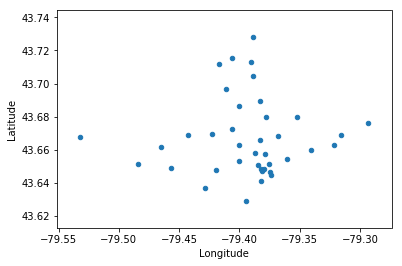

In [20]:
df_tor.plot(x='Longitude', y='Latitude', kind='scatter')

In [21]:
df_torClus= df_tor.drop(['Postcode', 'Borough', 'Neighbourhood'], 1) #prepare for clustering
df_torClus.head()

,Latitude,Longitude
0,43.676357,-79.293031
1,43.679557,-79.352188
2,43.668999,-79.315572
3,43.659526,-79.340923
4,43.728020,-79.388790


In [22]:
kclusters = 4 #new clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_torClus)
df_tor.insert(0, 'Cluster Labels', kmeans.labels_) #merge the data with colusters
df_tor.head()

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,2,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,2,M4K,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,2,M4M,East Toronto,Studio District,43.659526,-79.340923
4,3,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [23]:
# create map
latitude=43.651070
longitude=-79.347015
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_tor['Latitude'], df_tor['Longitude'], df_tor['Neighbourhood'], df_tor['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 4. Cluster examination


Cluster 1

In [24]:
df_tor.head() 

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,2,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,2,M4K,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,2,M4M,East Toronto,Studio District,43.659526,-79.340923
4,3,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [25]:
df_tor.loc[df_tor['Cluster Labels'] == 0]

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
10,0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
11,0,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675
12,0,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
13,0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
14,0,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
16,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
17,0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
18,0,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
19,0,M5J,Downtown Toronto,"Union Station, Toronto Islands, Harbourfront East",43.640816,-79.381752


Cluster 2

In [26]:
df_tor.loc[df_tor['Cluster Labels'] == 1]

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
31,1,M6H,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259
34,1,M6P,West Toronto,"The Junction South, High Park",43.661608,-79.464763
35,1,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325
36,1,M6S,West Toronto,"Swansea, Runnymede",43.651571,-79.484450
38,1,M9A,Downtown Toronto,Queen's Park,43.667856,-79.532242


Cluster 3

In [27]:
df_tor.loc[df_tor['Cluster Labels'] == 2]

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,2,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,2,M4K,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,2,M4M,East Toronto,Studio District,43.659526,-79.340923
37,2,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558


Cluster 4

In [28]:
df_tor.loc[df_tor['Cluster Labels'] == 3]

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
4,3,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,3,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,3,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,3,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,3,M4T,Central Toronto,"Summerhill East, Moore Park",43.689574,-79.383160
9,3,M4V,Central Toronto,"South Hill, Deer Park, Forest Hill SE, Rathnel...",43.686412,-79.400049
22,3,M5N,Central Toronto,Roselawn,43.711695,-79.416936
23,3,M5P,Central Toronto,"Forest Hill North, Forest Hill West",43.696948,-79.411307


<a id='item6'></a>

## 5. Conclusions

1. kmeans clustering has divided the postcodes fairly accurately into appropriate boroughs